In [17]:
import matplotlib.pyplot as plt
import numpy as np
import sys
import os
import pandas as pd
import plotly.express as px
from sklearn.preprocessing import MinMaxScaler

sys.path.append(os.path.abspath('../src/'))
from ModelSelection import *
from ActivationFunctions import *
from NeuralNetwork import *
from MyUtils import *

In [18]:
tr_df = pd.read_csv('../data/monks_csv/monks_tr_3.csv', index_col=0)
len_training = len(tr_df)
val_df = pd.read_csv('../data/monks_csv/monks_ts_3.csv', index_col=0) # test in realtà ma va be
len_validation = len(val_df)
len_dataset = len_training + len_validation
val_df.sample(5, random_state=RANDOM_STATE)

,input_1,input_2,input_3,input_4,input_5,input_6,output_1
173,2,1,2,1,3,2,1
91,1,2,2,3,2,2,1
105,1,3,1,2,1,2,0
431,3,3,2,3,4,2,0
389,3,3,1,1,3,2,1


In [19]:
def OHE(df):
    OHE = pd.get_dummies(df, columns=['input_'+str(i) for i in range(1, 7)])
    OHE = OHE.set_axis(['output_1'] + ['input_' + str(i) for i in range(1, len(OHE.columns))], axis=1)
    cols = OHE.columns.tolist()
    cols = cols[1:] + cols[:1]
    OHE = OHE[cols]
    return OHE

In [20]:
tr_df_OHE = OHE(tr_df)
tr_df_OHE.sample(5, random_state=RANDOM_STATE)

,input_1,input_2,input_3,input_4,input_5,input_6,input_7,input_8,input_9,input_10,input_11,input_12,input_13,input_14,input_15,input_16,input_17,output_1
93,False,False,True,True,False,False,True,False,False,False,True,False,False,False,True,False,True,0
16,True,False,False,True,False,False,False,True,False,False,True,False,False,True,False,False,True,1
17,True,False,False,False,True,False,True,False,True,False,False,False,False,True,False,True,False,1
95,False,False,True,True,False,False,False,True,False,True,False,False,False,True,False,False,True,1
35,True,False,False,False,False,True,True,False,True,False,False,False,True,False,False,True,False,0


In [21]:
val_df_OHE = OHE(val_df)
val_df_OHE.sample(5, random_state=RANDOM_STATE)

,input_1,input_2,input_3,input_4,input_5,input_6,input_7,input_8,input_9,input_10,input_11,input_12,input_13,input_14,input_15,input_16,input_17,output_1
173,False,True,False,True,False,False,False,True,True,False,False,False,False,True,False,False,True,1
91,True,False,False,False,True,False,False,True,False,False,True,False,True,False,False,False,True,1
105,True,False,False,False,False,True,True,False,False,True,False,True,False,False,False,False,True,0
431,False,False,True,False,False,True,False,True,False,False,True,False,False,False,True,False,True,0
389,False,False,True,False,False,True,True,False,True,False,False,False,False,True,False,False,True,1


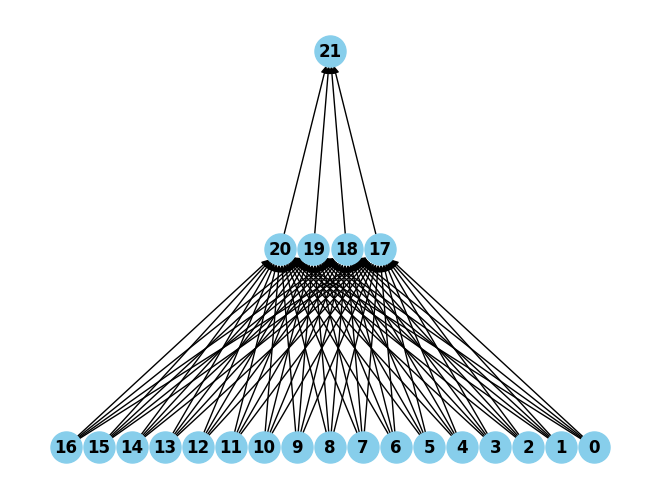

In [22]:
TR_INPUT = len(tr_df_OHE.columns) - 1
TR_OUTPUT = 1
hidden_len = 4
topology = create_stratified_topology([TR_INPUT,hidden_len,TR_OUTPUT], 
                                      [[None,[]]]*TR_INPUT + [['sigmoid', [1]]]*hidden_len + [['sigmoid', [1]]])
NeuralNetwork.display_topology(topology)

In [23]:
MS = ModelSelection('GS_1.csv')

In [24]:
training_set = tr_df_OHE.values
validation_set = val_df_OHE.values
metrics = [ErrorFunctions.mean_squared_error, ] #ErrorFunctions.mean_euclidean_error, 



collect_data = True
collect_data_batch = False # per il momento. molto costoso!!!! False di default
verbose = True

#stats = NN.train(training_set, validation_set, batch_size, max_epochs, error_decrease_tolerance, patience, min_epochs, 
#                   learning_rate, lambda_tikhonov, alpha_momentum, metrics, collect_data, collect_data_batch, verbose)
hyperparam_grid = {
    'learning_rate':[0.01, 0.1, 0.001],
    'alpha_momentum':[0, 0.01],
    'lambda_tikhonov':[0.01],
    'batch_size':[1, int(len_training/5)],
    'min_epochs': [3],
    'max_epochs':[10],
    'error_decrease_tolerance':[0.0001],
    'patience':[50],
    'topology': [topology]
}
MS.grid_searchKF(training_set, hyperparam_grid, 2, 3, True)

DONE:  [[0.01, 1, 0.0001, 0.01, 0.001, 10, 3, 50, "{0: ['input_0', None, [], [17, 18, 19, 20]], 1: ['input_0', None, [], [17, 18, 19, 20]], 2: ['input_0', None, [], [17, 18, 19, 20]], 3: ['input_0', None, [], [17, 18, 19, 20]], 4: ['input_0', None, [], [17, 18, 19, 20]], 5: ['input_0', None, [], [17, 18, 19, 20]], 6: ['input_0', None, [], [17, 18, 19, 20]], 7: ['input_0', None, [], [17, 18, 19, 20]], 8: ['input_0', None, [], [17, 18, 19, 20]], 9: ['input_0', None, [], [17, 18, 19, 20]], 10: ['input_0', None, [], [17, 18, 19, 20]], 11: ['input_0', None, [], [17, 18, 19, 20]], 12: ['input_0', None, [], [17, 18, 19, 20]], 13: ['input_0', None, [], [17, 18, 19, 20]], 14: ['input_0', None, [], [17, 18, 19, 20]], 15: ['input_0', None, [], [17, 18, 19, 20]], 16: ['input_0', None, [], [17, 18, 19, 20]], 17: ['hidden_1', 'sigmoid', [1], [21]], 18: ['hidden_1', 'sigmoid', [1], [21]], 19: ['hidden_1', 'sigmoid', [1], [21]], 20: ['hidden_1', 'sigmoid', [1], [21]], 21: ['output_2', 'sigmoid', [1], 

Training a new model :  [24, 10, 0.0001, 50, 3, 0.001, 0.01, 0, [<function mean_squared_error at 0x7f03100eeb60>], False, False, False]
Training a new model :  [1, 10, 0.0001, 50, 3, 0.1, 0.01, 0, [<function mean_squared_error at 0x7f03100eeb60>], False, False, False]
Training a new model :  [24, 10, 0.0001, 50, 3, 0.01, 0.01, 0.01, [<function mean_squared_error at 0x7f03100eeb60>], False, False, False]
Training a new model :  [24, 10, 0.0001, 50, 3, 0.1, 0.01, 0.01, [<function mean_squared_error at 0x7f03100eeb60>], False, False, False]
Training a new model :  [1, 10, 0.0001, 50, 3, 0.01, 0.01, 0.01, [<function mean_squared_error at 0x7f03100eeb60>], False, False, False]
Training a new model :  [1, 10, 0.0001, 50, 3, 0.001, 0.01, 0, [<function mean_squared_error at 0x7f03100eeb60>], False, False, False]
Training a new model :  [24, 10, 0.0001, 50, 3, 0.001, 0.01, 0.01, [<function mean_squared_error at 0x7f03100eeb60>], False, False, False]
Training a new model :  [1, 10, 0.0001, 50, 3